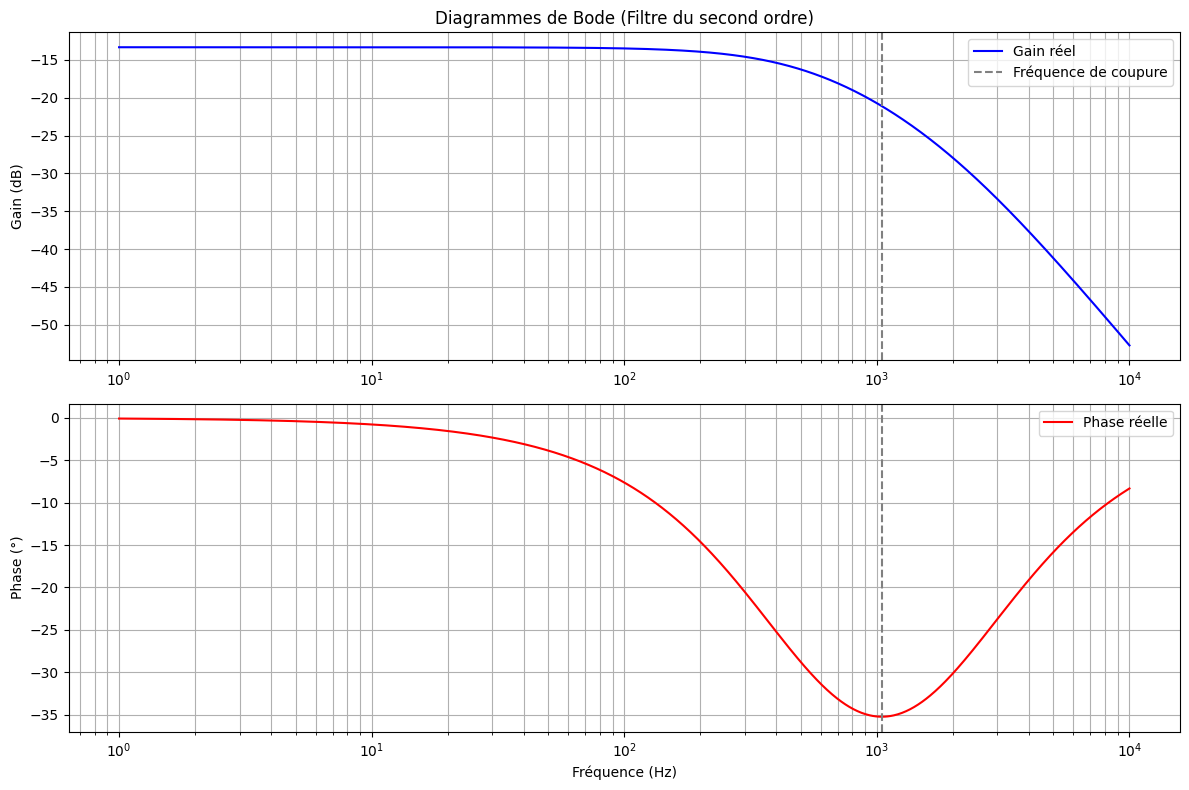

(np.float64(6575.207408776327),
 np.float64(1046.476760961205),
 0.2157676348547718,
 0.707,
 0.0004,
 1.7333333333333334)

In [6]:
import numpy as np

# Données numériques
R1 = 6.3        # en ohms
R2 = 2          # en ohms
R3 = 13         # en ohms
C = 268e-6      # en farads

f = 10 ** np.linspace(0, 4, 1000)  # fréquence de 1 Hz à 10 kHz
omega = 2 * np.pi * f

# Calcul de R_eff (résistance équivalente en parallèle de R2 et R3)
R_eff = (R2 * R3) / (R2 + R3)

L1 = 0.4e-3

# Calcul de Go
Go = R_eff / (R1 + R_eff)

# Calcul de omega_0 (pulsation propre)
omega_0 = np.sqrt((R1 + R_eff) / (L1 * R_eff * C))

# Facteur d'amortissement m
m = 0.707  # Valeur de m pour un filtre de Butterworth

# Fonction de transfert en jω
s = 1j * omega
T = Go / (1 + (2 * m / omega_0) * s - (s ** 2) / (omega_0 ** 2))

# Calcul des gains en dB
gain_dB = 20 * np.log10(np.abs(T))

# Calcul de la phase en degrés
phase_deg = np.angle(T, deg=True)

# Tracés des diagrammes de Bode
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Diagramme de gain
plt.subplot(2, 1, 1)
plt.semilogx(f, gain_dB, label="Gain réel", color='blue')
plt.axvline(omega_0 / (2 * np.pi), color='grey', linestyle='--', label="Fréquence de coupure")
plt.ylabel("Gain (dB)")
plt.grid(True, which="both")
plt.title("Diagrammes de Bode (Filtre du second ordre)")
plt.legend()

# Diagramme de phase
plt.subplot(2, 1, 2)
plt.semilogx(f, phase_deg, label="Phase réelle", color='red')
plt.axvline(omega_0 / (2 * np.pi), color='grey', linestyle='--')
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Phase (°)")
plt.grid(True, which="both")
plt.legend()

plt.tight_layout()
plt.show()

# Résultats numériques
omega_0, omega_0 / (2 * np.pi), Go, m, L1, R_eff